In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import norm
import seaborn as sns
#import globalfunctions
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [2]:
def cdf(data,label):
    # sort the data:
    data_sorted = np.sort(data)

    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)

    # plot the sorted data:
    #fig = plt.figure()
    #ax1 = fig.add_subplot(121)
    #ax1.plot(p, data_sorted)
    #ax1.set_xlabel('$p$')
    #ax1.set_ylabel('$x$')

    #ax2 = fig.add_subplot(122)
    #ax2.plot(data_sorted, p)
    #ax2.set_xlabel('${}$'.format(label))
    #ax2.set_ylabel('$p$')
    return (pd.DataFrame({label:data_sorted,"probability":p}))

In [3]:
#https://github.com/psychhack2019/General-Social-Survey-Dataset/blob/master/GSS2018.zip
#df=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/GSS2018.csv")
df=pd.read_csv("GSS2018.csv")
for item in df.columns:
    print(item)
    
df['INCOME']=df['INCOME'].replace([98,99],np.nan)
df['HEIGHT']=df['HEIGHT'].replace([98,99],np.nan)
df['WEIGHT']=df['WEIGHT'].replace([98,99],np.nan)
df['AGE']=df['AGE'].replace([0,1,2,3,4,5,6,7,98,99],np.nan)
df['EDUC']=df['EDUC'].replace([98,99],np.nan)

df = df.dropna(subset=['INCOME', 'HEIGHT','WEIGHT','AGE','EDUC'])

#print(df[df["INCOME"]==98])

ABANY
ABDEFECT
ABFELEGL
ABHELP1
ABHELP2
ABHELP3
ABHELP4
ABHLTH
ABINSPAY
ABMEDGOV1
ABMEDGOV2
ABMELEGL
ABMORAL
ABNOMORE
ABPOOR
ABPOORW
ABRAPE
ABSINGLE
ABSTATE1
ABSTATE2
ACQNTSEX
ACTSSOC
ADULTS
ADVFRONT
AFFRMACT
AFRAIDOF
AFTERLIF
AGE
AGED
AGEKDBRN
ANCESTRS
ARTHRTIS
ASTROLGY
ASTROSCI
ATHEISTS
ATTEND
ATTEND12
ATTENDMA
ATTENDPA
AWAY1
AWAY11
AWAY2
AWAY3
AWAY4
AWAY5
AWAY6
AWAY7
BABIES
BACKPAIN
BALLOT
BALNEG
BALPOS
BEFAIR
BETRLANG
BIBLE
BIGBANG
BIGBANG1
BIGBANG2
BIRD
BIRDB4
BORN
BOYORGRL
BREAKDWN
BUDDHSTS
BUYESOP
BUYVALUE
CANTRUST
CAPPUN
CAT
CATB4
CHARACTR
CHEMGEN
CHILDS
CHLDIDEL
CHRISTNS
CHURHPOW
CLASS
CLERGVTE
CLOSETO1
CLOSETO2
CLOSETO3
CLOSETO4
CLOSETO5
CNTCTFAM
CNTCTFRD
CNTCTKID
CNTCTPAR
CNTCTSIB
CODEG
CODEN
COEDUC
COEVWORK
COFUND
COHORT
COHRS1
COHRS2
COIND10
COISCO08
COJew
COLATH
COLCOM
COLDEG1
COLHOMO
COLMIL
COLMSLM
COLRAC
COLSCI
COLSCINM
COMFORT
COMPANY
COMPPERF
COMPREND
COMPUSE
COMPWAGE
CONARMY
CONBIZ
CONBUS
CONCHURH
CONCLERG
CONCONG
CONCOURT
CONDEMND
CONDOM
CONDRIFT
CONEDUC
CONF2F
CONF

(array([  3.,  12.,   6.,  26.,  78., 150., 786., 418., 498., 228.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

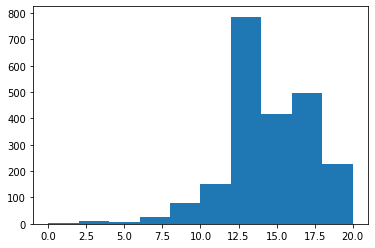

In [4]:
education=df["EDUC"].astype(float)
#education=education.replace([98,99],np.nan)
plt.hist(education.dropna(),label='education',bins=10)
#print(education.value_counts().sort_index())



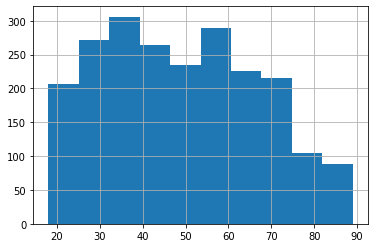

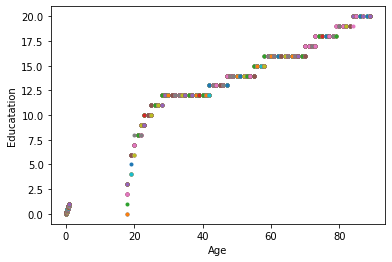

In [5]:
age=df["AGE"]
age=age.replace([0,1,2,3,4,5,6,7,98,99],np.nan)

def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

x_age=ecdf(age)
y_educ=ecdf(education)

age.hist()
plt.show()

plt.plot(x_age, y_educ, marker='.', linestyle='none')
plt.xlabel("Age")
plt.ylabel("Educatation")
plt.show()

In [6]:
print ("the income probability at age 50 ")
    
probabilities=cdf(age,"age")    
#probabilities.reset_index()

#for key,value in probabilities.iterrows():
#    print(key,value)
print(probabilities[probabilities["age"]==50].mean())

the income probability at age 50 
age            50.00000
probability     0.52382
dtype: float64


<Figure size 432x288 with 0 Axes>

Text(0, 0.5, '$p$')

<Figure size 432x288 with 0 Axes>

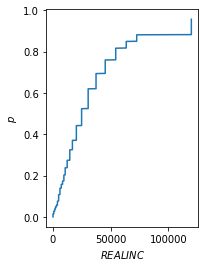

In [7]:
income=df["REALINC"]
income=income.replace([0,1,2,3,4,5,6,7,98,99],np.nan)
accum_df=cdf(income,"REALINC")

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(accum_df["REALINC"], accum_df["probability"])
ax2.set_xlabel('$REALINC$')
ax2.set_ylabel('$p$')

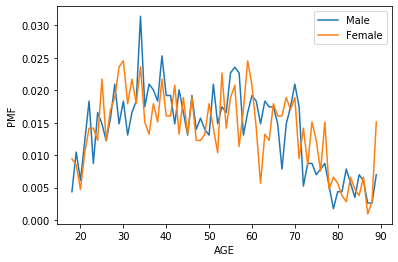

In [8]:
def Pmf(data,label):
    total_count=data.count()
    return_df=data.value_counts().rename_axis(label).reset_index(name='Counts')
    return_df["probability"]=return_df["Counts"]/total_count
    return_df=return_df.sort_values(by=label)
    return return_df
    

#print(df["GENDER1"])
male=df["GENDER1"]==1

male_age=age[male]
female_age=age[~male]

male_age_proba=Pmf(male_age,"AGE")
female_age_proba=Pmf(female_age,"AGE")

plt.plot(male_age_proba["AGE"],male_age_proba["probability"])
plt.plot(female_age_proba["AGE"],female_age_proba["probability"])
plt.legend(["Male","Female"])
plt.xlabel("AGE")
plt.ylabel("PMF")
plt.show()


Text(0, 0.5, '$p$')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

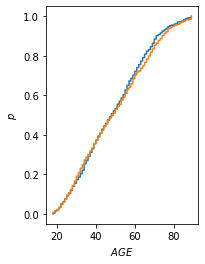

In [9]:
male_age_df=cdf(male_age,"AGE")
female_age_df=cdf(female_age,"AGE")
fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(male_age_df["AGE"], male_age_df["probability"])
ax2.plot(female_age_df["AGE"], female_age_df["probability"])
ax2.set_xlabel('$AGE$')
ax2.set_ylabel('$p$')


[2018]


Text(0, 0.5, '$p$')

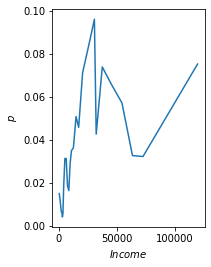

In [10]:
real_income=df["REALINC"]
filter=df["YEAR"]==2018
print(df["YEAR"].unique())

avg_income=real_income.mean()
real_income=real_income.replace(np.nan,avg_income)
real_income=real_income.replace(0,avg_income)


real_income_df=Pmf(real_income[filter],"REALINC")

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(real_income_df["REALINC"], real_income_df["probability"])
ax2.set_xlabel('$Income$')
ax2.set_ylabel('$p$')

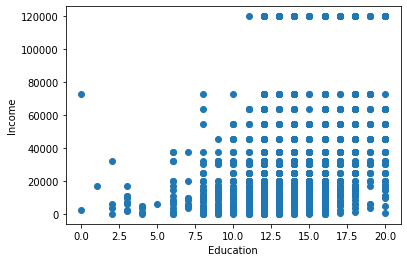

High School or less education 0.4036281179138322
Bachelor Count= 726
Associate Count= 418
High school or less= 890
Total Count 2205
High school or less percentage 0.4036281179138322


Text(0, 0.5, '$p$')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

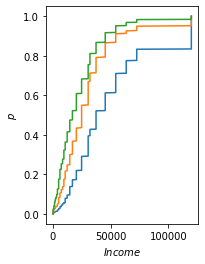

In [11]:
plt.scatter(education,real_income)
plt.xlabel("Education")
plt.ylabel("Income")
plt.show()

print("High School or less education", df[df["EDUC"]<=12]["EDUC"].count()/df["EDUC"].count())


bachelor= (education>=16)
associate=(education>=14) & (education<16)
highschool=(education<=12)

print("Bachelor Count=", education[bachelor].count())
print("Associate Count=", education[associate].count())
print("High school or less=", education[highschool].count())
print("Total Count",education.count())
print("High school or less percentage",education[highschool].count()/education.count())



bachelor_income_df=cdf(real_income[bachelor],"REALINC")
associate_income_df=cdf(real_income[associate],"REALINC")
highschool_income_df=cdf(real_income[highschool],"REALINC")
#female_age_df=cdf(female_age,"AGE")
fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(bachelor_income_df["REALINC"], bachelor_income_df["probability"],label="Bachelor")
ax2.plot(associate_income_df["REALINC"], associate_income_df["probability"],label="Associate")
ax2.plot(highschool_income_df["REALINC"], highschool_income_df["probability"],label="Associate")

ax2.set_xlabel('$Income$')
ax2.set_ylabel('$p$')


kernel density closely approximates the guassian distribution
the kde matches closely the pdf


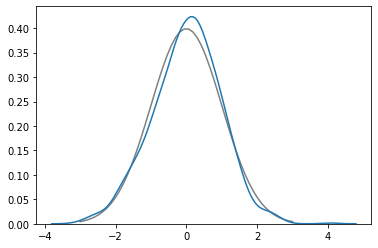

kde distribution for education, income, and age


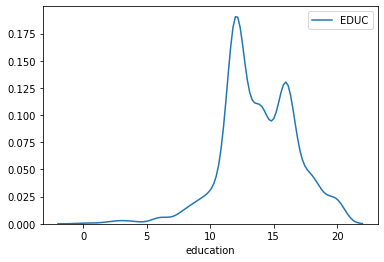

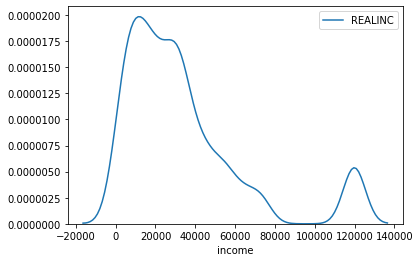

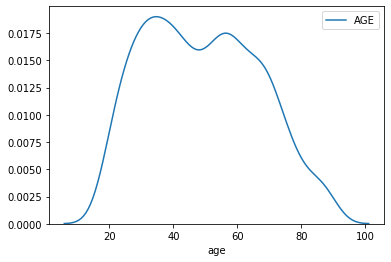

In [12]:
print("kernel density closely approximates the guassian distribution")
sample= np.random.normal(size=1000)

xs=np.linspace(-3,3)
ys=norm(0,1).pdf(xs)

print("the kde matches closely the pdf")
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)
plt.show()

print("kde distribution for education, income, and age")
sns.kdeplot(education)
plt.xlabel("education")
plt.show()
sns.kdeplot(real_income)
plt.xlabel("income")
plt.show()
sns.kdeplot(age)
plt.xlabel("age")
plt.show()

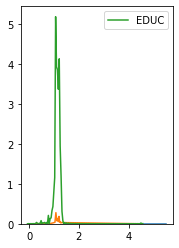

In [13]:
avg_education=education.mean()
education=education.replace(np.nan,avg_income)
education=education.replace(0,avg_income)
log_education=np.log10(education)

mean=log_education.mean()
std=log_education.std()

xs = np.linspace(2, 5.5)
ys = norm(mean,std).pdf(xs)

log_education_df=Pmf(log_education,"EDUC")

fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(xs, ys)
ax2.plot(log_education_df["EDUC"], log_education_df["probability"])
education=df["EDUC"].astype(float)
sns.kdeplot(log_education)

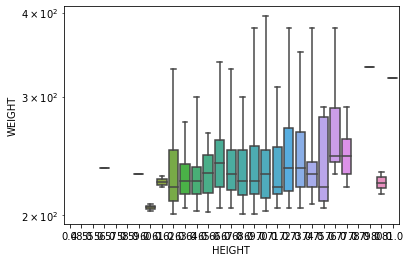

In [14]:
height=df["HEIGHT"].astype(float)
height=height.replace([98,99],np.nan)

weight=df["WEIGHT"].astype(float)
weight=weight.replace([98,99],np.nan)

weight_filter=(df["WEIGHT"]<400) &(df["WEIGHT"]>200)
weight= df[weight_filter]["WEIGHT"]

sns.boxplot(x=height, y=weight, data=df, whis=10)
plt.yscale("log")
plt.show()

probability distribution of the income categories


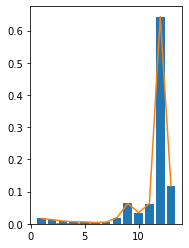

In [15]:
print("probability distribution of the income categories")
income_category=df["INCOME"]
income_category=income_category.replace([98,99],np.nan)

income_category_df=Pmf(income_category,"INCOME")


fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(xs, ys)
ax2.bar(income_category_df["INCOME"], income_category_df["probability"])
ax2.plot(income_category_df["INCOME"], income_category_df["probability"])

plt.show()





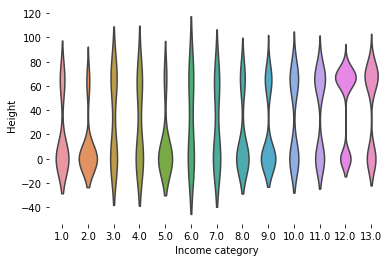

In [16]:
# Make a violin plot

sns.violinplot(x="INCOME",y="HEIGHT",data=df,inner=None)
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income category')
plt.ylabel('Height')
plt.show()




In [17]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
#covariance/(std of x)*(std of y)
    # Return entry [0,1]
    return corr_mat[0,1]

compare distribution of log 10 of income with the cdf of income


<Figure size 432x288 with 0 Axes>

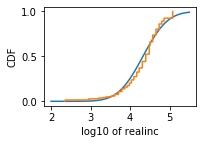

In [18]:
print ("compare distribution of log 10 of income with the cdf of income")
log_income=np.log10(real_income)

mean=log_income.mean()
std=log_income.std()

xs = np.linspace(2, 5.5)
ys = norm(mean,std).cdf(xs)

# Plot the model CDF
#plt.clf()
#plt.plot(xs, ys, color='gray')

#log_income.plot()
log_income_df=cdf(log_income,"REALINC")

fig = plt.figure()
ax2 = fig.add_subplot(222)
ax2.plot(xs, ys)
ax2.plot(log_income_df["REALINC"], log_income_df["probability"])

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

In [19]:

print("pearon_r weight to height",pearson_r(height[weight_filter],weight))
print("pearon_r age to weight",pearson_r(age[weight_filter],weight))
print("person_r education to age",pearson_r(real_income,age))
print("person_r education to income",pearson_r(real_income,education))

columns=['AGE','HEIGHT','WEIGHT','REALINC','EDUC']

subset=df[columns]
print(subset.corr())


pearon_r weight to height 0.16842139165080022
pearon_r age to weight -0.12437438168288106
person_r education to age 0.03922719859983616
person_r education to income 0.36956340491635115
              AGE    HEIGHT    WEIGHT   REALINC      EDUC
AGE      1.000000 -0.365089 -0.242366  0.028980 -0.012980
HEIGHT  -0.365089  1.000000  0.713949  0.206440  0.135248
WEIGHT  -0.242366  0.713949  1.000000  0.131929  0.130260
REALINC  0.028980  0.206440  0.131929  1.000000  0.367088
EDUC    -0.012980  0.135248  0.130260  0.367088  1.000000


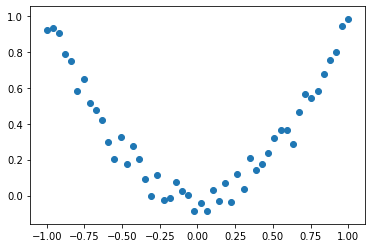

[[ 1.         -0.01165521]
 [-0.01165521  1.        ]]
the correlation is close to zero even though there is a non linear correlation
rvalue correlation variable -0.011655212232206037
rvalue of the linear regresor shows correlation


In [20]:
xs=np.linspace(-1,1)
ys=xs**2

ys += np.random.normal(0,0.05, len(xs))

plt.scatter(xs,ys)
plt.show()

print(np.corrcoef(xs,ys))

print("the correlation is close to zero even though there is a non linear correlation")

res=linregress(xs,ys)
print("rvalue correlation variable", res.rvalue)
print("rvalue of the linear regresor shows correlation")

Height to Weight rvalue correlation variable 0.16842139165080022


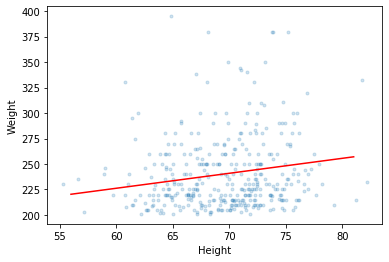

In [21]:
res=linregress(height[weight_filter],weight)
print("Height to Weight rvalue correlation variable", res.rvalue)

fx=np.array([height[weight_filter].min(),height[weight_filter].max()])
fy=res.intercept + res.slope * fx

plt.clf()

height_jitter = height[weight_filter] + np.random.normal(0,2,size=len(height[weight_filter]))

plt.plot(height_jitter,weight,'o', alpha=0.2,markersize=3)
plt.plot(fx,fy,'-',color='red')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()




Age to Weight rvalue correlation variable -0.12437438168288105


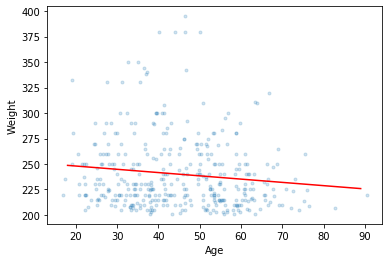

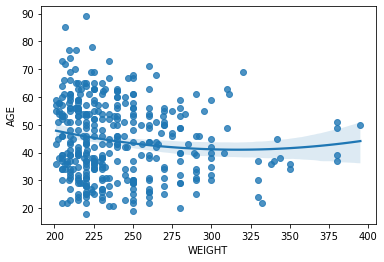

weight decrease as age increases linearly.  We need to an non linear predictor for the middle aged group.


In [22]:
res=linregress(age[weight_filter],weight)
print("Age to Weight rvalue correlation variable", res.rvalue)

fx=np.array([age[weight_filter].min(),age[weight_filter].max()])
fy=res.intercept + res.slope * fx

plt.clf()

age_jitter = age[weight_filter] + np.random.normal(0,2,size=len(age[weight_filter]))

plt.plot(age_jitter,weight,'o', alpha=0.2,markersize=3)
plt.plot(fx,fy,'-',color='red')
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()
sns.regplot(data=df[weight_filter], y='AGE', x="WEIGHT", order=2)
plt.show()

print("weight decrease as age increases linearly.  We need to an non linear predictor for the middle aged group.")

Intercept    254.414012
AGE           -0.320822
dtype: float64


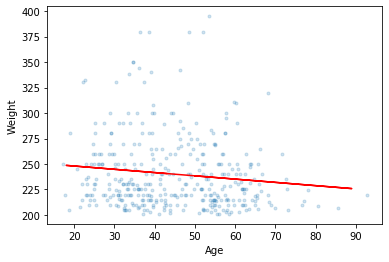

In [23]:
results= smf.ols("WEIGHT ~ AGE", data=df[weight_filter]).fit()
print(results.params)

#fx=np.linspace(0,len(df[weight_filter]))
fx=df[weight_filter]["AGE"]
fy=results.params.Intercept + results.params.AGE * fx

age_jitter = age[weight_filter] + np.random.normal(0,2,size=len(age[weight_filter]))

plt.plot(age_jitter,weight,'o', alpha=0.2,markersize=3)
plt.plot(fx,fy,'-',color='red')
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

Predicting the real income
Intercept   -24692.592837
EDUC          3915.576958
AGE             59.012586
dtype: float64
The additive of age is small


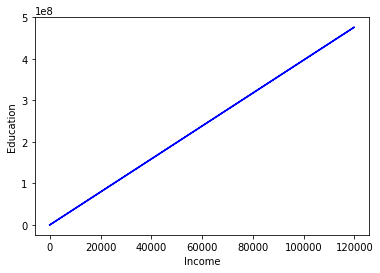

there is a correlation between age and income


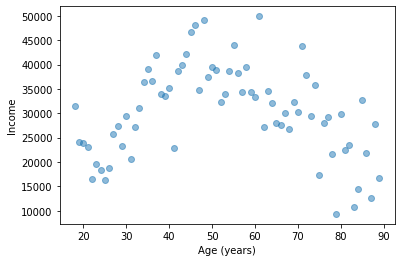

the correlation between age and income is non-linear.  correlation can not measure non linear
adding a quadratic variable for age
Intercept   -38626.156542
EDUC           859.890933
EDUC2          109.812722
AGE           1593.631924
AGE2           -15.067628
dtype: float64
The additive of age is small


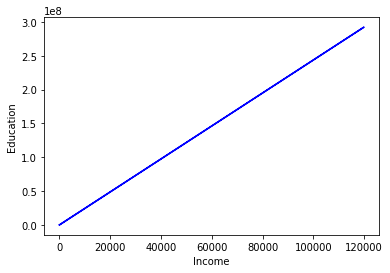

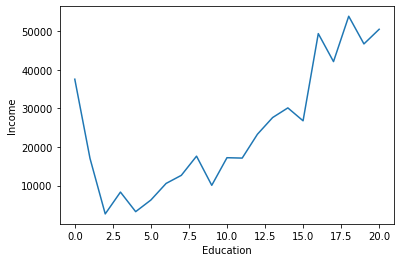

In [24]:
print("Predicting the real income")
results= smf.ols("REALINC ~ EDUC+AGE", data=df).fit()

print(results.params)
print("The additive of age is small")

fx=df["REALINC"]
fy=results.params.Intercept + results.params.EDUC * fx + results.params.AGE*fx

plt.plot(fx,fy,'-',color='blue')
plt.xlabel("Income")
plt.ylabel("Education")
plt.show()

print("there is a correlation between age and income")

grouped= df.groupby('AGE')
mean_income_by_age=grouped['REALINC'].mean()

plt.plot(mean_income_by_age,'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income')
plt.show()

print("the correlation between age and income is non-linear.  correlation can not measure non linear")

print("adding a quadratic variable for age")
df["AGE2"]=df["AGE"]**2
df["EDUC2"]=df["EDUC"]**2

results= smf.ols("REALINC ~ EDUC+EDUC2+AGE+AGE2", data=df).fit()

print(results.params)
print("The additive of age is small")

fx=df["REALINC"]
fy=results.params.Intercept + results.params.EDUC * fx + results.params.AGE*fx + results.params.AGE2*fx

plt.plot(fx,fy,'-',color='blue')
plt.xlabel("Income")
plt.ylabel("Education")
plt.show()

grouped= df.groupby('EDUC')
mean_income_by_age=grouped['REALINC'].mean()

plt.plot(mean_income_by_age,'-')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

the scatter plot represents the mean age by income
             ABANY     ABDEFECT     ABFELEGL      ABHELP1      ABHELP2  \
count  2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean      1.131973     1.009070     1.211338     1.586848     1.961905   
std       1.311093     1.400968     1.473221     1.516787     1.370681   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       0.000000     0.000000     0.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     2.000000   
75%       2.000000     1.000000     3.000000     2.000000     2.000000   
max       9.000000     9.000000     9.000000     9.000000     9.000000   

           ABHELP3      ABHELP4       ABHLTH     ABINSPAY    ABMEDGOV1  ...  \
count  2205.000000  2205.000000  2205.000000  2205.000000  2205.000000  ...   
mean      1.673923     1.305669     0.886621     2.013152     0.680272  ...   
std       1.372624     1.217682     1.233908 

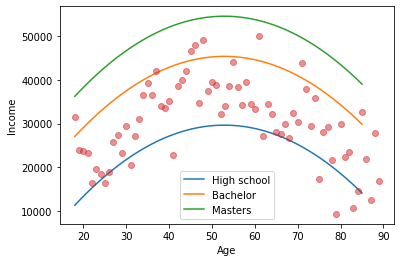

In [38]:
print("the scatter plot represents the mean age by income")
grouped= df.groupby('AGE')
mean_income_by_age=grouped['REALINC'].mean()

df2=pd.DataFrame()
df2['AGE']=np.linspace(18,85)
df2['AGE2']=df2['AGE']**2
df2['EDUC']=12
df2['EDUC2']=df2['EDUC']**2

df3=pd.DataFrame()
df3['AGE']=np.linspace(18,85)
df3['AGE2']=df3['AGE']**2
df3['EDUC']=16
df3['EDUC2']=df3['EDUC']**2

df4=pd.DataFrame()
df4['AGE']=np.linspace(18,85)
df4['AGE2']=df4['AGE']**2
df4['EDUC']=18
df4['EDUC2']=df4['EDUC']**2

#print("Max real income",df["REALINC"].max())
#print(df.describe())
results= smf.ols("REALINC ~ EDUC+EDUC2+AGE+AGE2", data=df).fit()

print("Make predictions using the prediction dataframe")
pred12=results.predict(df2)
pred16=results.predict(df3)
pred18=results.predict(df4)

plt.plot(df2['AGE'],pred12,label='High school')
plt.plot(df2['AGE'],pred16,label='Bachelor')
plt.plot(df2['AGE'],pred18,label='Masters')
plt.plot(mean_income_by_age,'o',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()




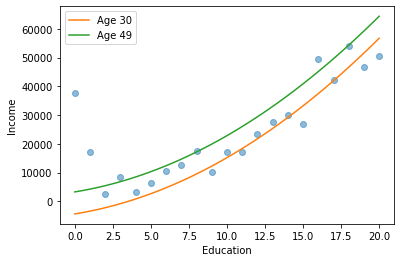

In [26]:
df2 = pd.DataFrame()
df2['EDUC'] = np.linspace(0,20)
df2['AGE'] = 30
df2['EDUC2'] = df2['EDUC']**2
df2['AGE2'] = df2['AGE']**2

df3 = pd.DataFrame()
df3['EDUC'] = np.linspace(0,20)
df3['AGE'] = 49
df3['EDUC2'] = df3['EDUC']**2
df3['AGE2'] = df3['AGE']**2


results= smf.ols("REALINC ~ EDUC+EDUC2+AGE+AGE2", data=df).fit()
plt.clf()
grouped = df.groupby('EDUC')
mean_income_by_educ = grouped['REALINC'].mean()
plt.plot(mean_income_by_educ,'o',alpha=0.5)

#print(df['AGE'].median())

# Plot the predictions
pred30 = results.predict(df2)
plt.plot(df2['EDUC'], pred30, label='Age 30')
pred48 = results.predict(df3)
plt.plot(df3['EDUC'], pred48, label='Age 49')

# Label axes
plt.xlabel('Education')
plt.ylabel('Income')
plt.legend()
plt.show()

In [27]:
print("using categorical variables")

results= smf.ols("REALINC ~ EDUC+EDUC2+AGE+AGE2+C(SEX)", data=df).fit()
print(results.params)

print("income for women is about 4700 dollar less than men")

using categorical variables
Intercept     -36553.697460
C(SEX)[T.2]    -4724.628247
EDUC             935.876596
EDUC2            107.368724
AGE             1594.525696
AGE2             -15.100642
dtype: float64
income for women is about 4700 dollar less than men


should a permit be required to own a gun
logit must be a variable of 0 or 1
1    1042
0     732
Name: GUNLAW, dtype: int64
Optimization terminated successfully.
         Current function value: 0.671568
         Iterations 4
Intercept      0.968601
C(SEX)[T.2]    0.202397
AGE           -0.050697
AGE2           0.000424
EDUC           0.061354
EDUC2         -0.001208
dtype: float64
women are more likely to support gun permit control


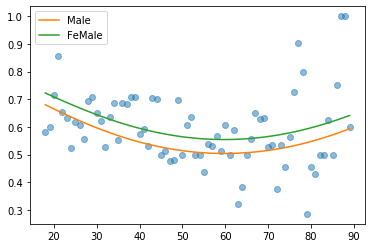

In [28]:
print("should a permit be required to own a gun")
formula="GUNLAW ~ AGE+AGE2+EDUC+EDUC2+C(SEX)"
print("logit must be a variable of 0 or 1")
gun_filter=(df["GUNLAW"]==0) | (df["GUNLAW"]==1)
print(df[gun_filter]["GUNLAW"].value_counts())
results = smf.logit(formula,data=df[gun_filter]).fit()
print(results.params)

print("women are more likely to support gun permit control")

df2=pd.DataFrame()
df2['AGE']=np.linspace(18,89)
df2['EDUC']=12
df2['AGE2']=df2['AGE']**2
df2['EDUC2']=df2['EDUC']**2
df2['SEX']=1
pred1=results.predict(df2)
df2['SEX']=2
pred2=results.predict(df2)

grouped=df[gun_filter].groupby('AGE')
favor_by_age=grouped['GUNLAW'].mean()

plt.plot(favor_by_age,'o',alpha=0.5)
plt.plot(df2['AGE'],pred1,label="Male")
plt.plot(df2['AGE'],pred2,label="FeMale")
plt.legend()

plt.show()

weed consensus
1    896
0    737
Name: GRASS, dtype: int64
Optimization terminated successfully.
         Current function value: 0.675615
         Iterations 5
Intercept     -1.986627
C(SEX)[T.2]   -0.242403
AGE            0.025382
AGE2          -0.000385
EDUC           0.273120
EDUC2         -0.008481
dtype: float64


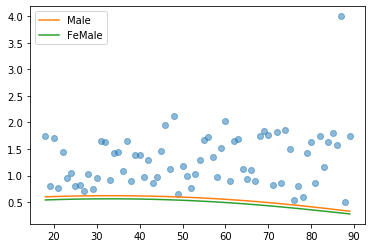

men and women were closely aligned 


In [29]:
print("weed consensus")

grass_filter=(df["GRASS"]==0) | (df["GRASS"]==1)
print(df[grass_filter]["GRASS"].value_counts())

formula="GRASS ~ AGE+AGE2+EDUC+EDUC2+C(SEX)"

results = smf.logit(formula,data=df[grass_filter]).fit()
print(results.params)

df2=pd.DataFrame()
df2['AGE']=np.linspace(18,89)
df2['EDUC']=12
df2['AGE2']=df2['AGE']**2
df2['EDUC2']=df2['EDUC']**2
df2['SEX']=1
pred1=results.predict(df2)
df2['SEX']=2
pred2=results.predict(df2)


grouped=df[gun_filter].groupby('AGE')
favor_by_age=grouped['GRASS'].mean()

plt.plot(favor_by_age,'o',alpha=0.5)
plt.plot(df2['AGE'],pred1,label="Male")
plt.plot(df2['AGE'],pred2,label="FeMale")
plt.legend()

plt.show()

print("men and women were closely aligned ")
